<a href="https://colab.research.google.com/github/DawnHarper/TP-FINAL-MATE-III/blob/main/TP_FINAL_MATE_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Este conjunto de datos contiene 13 características clínico-patológicas destinadas a predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló durante 15 años y cada paciente fue seguido durante al menos 10 años.*
# CONTENIDO:
**• Edad:** La edad del paciente en el momento del diagnóstico o tratamiento.

**• Género:** El sexo del paciente (masculino o femenino).

**• Tabaquismo:** Si el paciente es fumador o no.

**• Tabaquismo Hx:** Historial de tabaquismo del paciente (p. ej., si alguna vez ha fumado).

**• Radioterapia Hx:** Historial de tratamiento con radioterapia para cualquier condición.

**• Función tiroidea:** El estado de la función tiroidea, que posiblemente indique si hay alguna anomalía.

**• Examen físico:** Hallazgos de un examen físico del paciente, que puede incluir palpación de la glándula tiroides y las estructuras circundantes.

**• Adenopatía:** Presencia o ausencia de ganglios linfáticos agrandados (adenopatía) en la región del cuello.

**• Patología:** Tipos específicos de cáncer de tiroides según lo determinado por el examen patológico de muestras de biopsia.

**• Focalidad:** Si el cáncer es unifocal (limitado a una ubicación) o multifocal (presente en múltiples ubicaciones).

**• Riesgo:** La categoría de riesgo del cáncer basada en varios factores, como el tamaño del tumor, el grado de diseminación y el tipo histológico.

**• T:** Clasificación del tumor según su tamaño y extensión de la invasión a estructuras cercanas.

**• N:** Clasificación ganglionar que indica la afectación de los ganglios linfáticos.

**• M:** Clasificación de metástasis que indica la presencia o ausencia de metástasis a distancia.

**• Estadio:** El estadio general del cáncer, generalmente determinado combinando las clasificaciones T, N y M.

**• Respuesta:** Respuesta al tratamiento, que indica si el cáncer respondió positiva, negativamente o permaneció estable después del tratamiento.

**• Recurrente:** Indica si el cáncer ha recurrido después del tratamiento inicial.

***LINK: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data***

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import io

In [346]:
url = "https://raw.githubusercontent.com/DawnHarper/TP-FINAL-MATE-III/main/tiroides2.csv"
df = pd.read_csv(url)

In [347]:
df.head(11)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [348]:
print(df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [349]:
gen_rep = {
    "F": 0,  # Mujer
    "M": 1   # Hombre
}

smok_rep = {
    "No": 1,
    "Yes": 0
}

HxSmok_rep = {
    "No": 1,
    "Yes": 0
}

HxRad_rep = {
    "No": 1,
    "Yes": 0
}

ThyroidFunc_rep = {
    "Euthyroid": 0,
    "Clinical Hyperthyroidism": 1,
    "Subclinical Hyperthyroidism": 2,
    "Subclinical Hypothyroidism": 3,
    "Clinical Hypothyroidism": 4
}

PhysicalExam_rep = {
    "Multinodular goiter": 0,
    "Single nodular goiter-right": 1,
    "Single nodular goiter-left": 2,
    "Normal": 3,
    "Diffuse goiter": 4
}

Adenopathy_rep = {
    "No": 0,
    "Right": 1,
    "Bilateral": 2,
    "Left": 3,
    "Extensive": 4
}

Pathology_rep = {
    "Papillary": 0,
    "Micropapillary": 1,
    "Follicular": 2,
    "Hurthel cell": 3
}

Focality_rep = {
    "Uni-Focal": 0,
    "Multi-Focal": 1
}

Risk_rep = {
    "Low": 0,
    "Intermediate": 1,
    "High": 2
}

T_rep = {
    "T1a": 0,
    "T1b": 1,
    "T2": 2,
    "T3a": 3,
    "T4a": 4,
    "T4b": 5
}

N_rep = {
    "N0": 0,
    "N1a": 1,
    "N1b": 2
}

M_rep = {
    "M0": 0,
    "M1": 1
}

Stage_rep = {
    "I": 0,
    "II": 1,
    "III": 2,
    "IVA": 3,
    "IVB": 4
}

Response_rep = {
    "Excellent": 0,
    "Structural Incomplete": 1,
    "Indeterminate": 2,
    "Biochemical Incomplete": 3
}

Recurred_rep = {
    "No": 1,
    "Yes": 0
}

In [350]:
rep_d = {
    "Gender": gen_rep,
    "Smoking": smok_rep,
    "Hx Smoking": HxSmok_rep,
    "Hx Radiothreapy": HxRad_rep,
    "Thyroid Function": ThyroidFunc_rep,
    "Physical Examination": PhysicalExam_rep,
    "Adenopathy": Adenopathy_rep,
    "Pathology": Pathology_rep,
    "Focality": Focality_rep,
    "Risk": Risk_rep,
    "T": T_rep,
    "N": N_rep,
    "M": M_rep,
    "Stage": Stage_rep,
    "Response": Response_rep,
    "Recurred": Recurred_rep
}

In [351]:
# Reemplaza los valores
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
print("\nDataFrame despues de reemplazos:")
df.head()


DataFrame despues de reemplazos:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,1,1,1,0,2,0,1,0,0,0,0,0,0,2,1
1,34,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,30,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
3,62,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,62,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1


In [352]:
df["Adenopathy"] = pd.to_numeric(df["Adenopathy"], errors="coerce")
df["T"] = pd.to_numeric(df["T"], errors="coerce")

In [353]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,831.000000,837.000000,837.000000,837.00000,805.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,41.388292,0.200717,0.859020,0.922342,0.976105,0.321386,0.958184,0.521059,0.412186,0.369176,0.48626,2.113043,0.561529,0.063321,0.320191,0.729988,0.692951
std,15.589486,0.400776,0.348209,0.267793,0.152813,0.916716,0.926443,0.977692,0.836371,0.482870,0.69782,1.196342,0.868151,0.243686,0.908617,0.919601,0.461546
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,52.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.00000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.000000,2.00000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [354]:
# Normaliza
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Normalización
print("\nDataFrame normalizado:")
df_n.describe()


DataFrame normalizado:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02,831.000000,8.370000e+02,8.370000e+02,8.370000e+02,8.050000e+02,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02,8.370000e+02
mean,2.122290e-16,-8.489161e-17,4.244580e-17,1.358266e-16,-2.546748e-16,3.183435e-18,-2.758977e-17,0.000000,-8.064702e-17,-3.395664e-17,5.093496e-17,8.826618e-17,-1.358266e-16,-1.697832e-17,-3.395664e-17,5.093496e-17,-1.697832e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.692698e+00,-5.008204e-01,-2.466970e+00,-3.444232e+00,-6.387581e+00,-3.505841e-01,-1.034261e+00,-0.532948,-4.928272e-01,-7.645444e-01,-6.968283e-01,-1.766253e+00,-6.468108e-01,-2.598486e-01,-3.523940e-01,-7.938093e-01,-1.501370e+00
25%,-7.305110e-01,-5.008204e-01,4.048713e-01,2.899936e-01,1.563667e-01,-3.505841e-01,-1.034261e+00,-0.532948,-4.928272e-01,-7.645444e-01,-6.968283e-01,-9.303720e-01,-6.468108e-01,-2.598486e-01,-3.523940e-01,-7.938093e-01,-1.501370e+00
50%,-2.814905e-01,-5.008204e-01,4.048713e-01,2.899936e-01,1.563667e-01,-3.505841e-01,4.513607e-02,-0.532948,-4.928272e-01,-7.645444e-01,-6.968283e-01,-9.449091e-02,-6.468108e-01,-2.598486e-01,-3.523940e-01,-7.938093e-01,6.652624e-01
75%,6.806965e-01,-5.008204e-01,4.048713e-01,2.899936e-01,1.563667e-01,-3.505841e-01,1.124533e+00,0.489869,-4.928272e-01,1.306406e+00,7.362069e-01,7.413902e-01,1.656937e+00,-2.598486e-01,-3.523940e-01,2.936185e-01,6.652624e-01
max,2.605070e+00,1.994338e+00,4.048713e-01,2.899936e-01,1.563667e-01,4.012819e+00,3.283327e+00,3.558321,3.094098e+00,1.306406e+00,2.169242e+00,2.413152e+00,1.656937e+00,3.843798e+00,4.049901e+00,2.468474e+00,6.652624e-01


In [355]:
df.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,831.000000,837.000000,837.000000,837.00000,805.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,41.388292,0.200717,0.859020,0.922342,0.976105,0.321386,0.958184,0.521059,0.412186,0.369176,0.48626,2.113043,0.561529,0.063321,0.320191,0.729988,0.692951
std,15.589486,0.400776,0.348209,0.267793,0.152813,0.916716,0.926443,0.977692,0.836371,0.482870,0.69782,1.196342,0.868151,0.243686,0.908617,0.919601,0.461546
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,52.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.00000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.000000,2.00000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


In [356]:
# Calcula y muestra la matriz de correlacion
corr_matrix = df_n.corr()
print("\nMatriz de correlacion:")
df_n.corr()


Matriz de correlacion:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.206532,-0.372660,-0.200212,-0.217533,0.018544,-0.086500,0.099204,0.176146,0.261239,0.374836,0.320898,0.100535,0.301463,0.580733,0.244535,-0.331859
Gender,0.206532,1.000000,-0.602702,-0.188951,-0.273159,0.026070,-0.048243,0.252873,0.063352,0.210022,0.283607,0.254114,0.225745,0.224896,0.243759,0.143980,-0.332486
Smoking,-0.372660,-0.602702,1.000000,0.292941,0.341254,-0.030265,0.000244,-0.248803,-0.235602,-0.252107,-0.416572,-0.394960,-0.212644,-0.359867,-0.469630,-0.186260,0.370418
Hx Smoking,-0.200212,-0.188951,0.292941,1.000000,0.276134,-0.122350,0.092967,-0.087747,-0.123946,-0.027785,-0.194548,-0.164281,-0.069463,-0.181176,-0.320463,-0.090107,0.174606
Hx Radiothreapy,-0.217533,-0.273159,0.341254,0.276134,1.000000,0.003652,0.018281,-0.197513,-0.110028,-0.123469,-0.294734,-0.225216,-0.097103,-0.473273,-0.470343,-0.080015,0.201126
Thyroid Function,0.018544,0.026070,-0.030265,-0.122350,0.003652,1.000000,0.024294,-0.021661,0.061035,0.034297,0.013456,-0.066117,-0.034647,-0.037661,0.040021,0.007993,0.046919
Physical Examination,-0.086500,-0.048243,0.000244,0.092967,0.018281,0.024294,1.000000,-0.064950,0.145771,-0.283644,-0.212744,-0.203188,-0.176009,0.022339,-0.111965,-0.098914,0.143378
Adenopathy,0.099204,0.252873,-0.248803,-0.087747,-0.197513,-0.021661,-0.064950,1.000000,-0.120146,0.332937,0.592917,0.433387,0.781957,0.233094,0.264706,0.206704,-0.577271
Pathology,0.176146,0.063352,-0.235602,-0.123946,-0.110028,0.061035,0.145771,-0.120146,1.000000,0.087773,0.035334,0.024260,-0.223598,0.083071,0.112597,0.040676,-0.000211
Focality,0.261239,0.210022,-0.252107,-0.027785,-0.123469,0.034297,-0.283644,0.332937,0.087773,1.000000,0.478338,0.452655,0.378045,0.258549,0.365498,0.213978,-0.408562


In [357]:
features = ["Age", "Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy", "Thyroid Function", "Physical Examination",
            "Adenopathy", "Pathology", "Focality", "Risk", "Stage", "Response"]

df[features] = df[features] / df[features].max()

In [358]:
df[df["Recurred"]==0].head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
48,0.317073,0.0,1.0,1.0,1.0,0.0,0.75,1.00,0.000000,0.0,0.5,0.0,2,0,0.0,0.333333,0
87,0.439024,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.000000,1.0,0.0,1.0,0,0,0.0,0.666667,0
88,0.426829,0.0,1.0,1.0,1.0,0.0,0.00,0.25,0.000000,1.0,0.5,1.0,2,0,0.0,0.333333,0
89,0.378049,1.0,0.0,1.0,1.0,0.0,0.00,0.25,0.000000,1.0,0.5,1.0,2,0,0.0,0.333333,0
90,0.219512,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.000000,0.0,0.5,1.0,2,0,0.0,0.333333,0
91,0.756098,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.666667,1.0,0.5,1.0,0,0,0.0,0.333333,0
223,0.682927,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.000000,0.0,0.0,2.0,0,0,0.0,0.333333,0
224,0.243902,1.0,1.0,1.0,1.0,0.0,0.25,0.25,0.000000,0.0,0.0,2.0,0,0,0.0,0.333333,0
225,0.756098,0.0,1.0,1.0,1.0,1.0,0.00,0.00,0.000000,0.0,0.0,2.0,0,0,0.0,1.000000,0
226,0.207317,0.0,1.0,1.0,1.0,0.0,0.25,0.00,0.000000,0.0,1.0,2.0,0,0,0.0,0.333333,0


In [359]:
df[df["Recurred"]==1].head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.329268,0.0,1.0,1.0,1.0,0.00,0.50,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.666667,1
1,0.414634,0.0,1.0,0.0,1.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
2,0.365854,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
3,0.756098,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
4,0.756098,0.0,1.0,1.0,1.0,0.00,0.00,0.0,0.333333,1.0,0.0,0.0,0,0,0.0,0.000000,1
5,0.634146,1.0,0.0,1.0,1.0,0.00,0.00,0.0,0.333333,1.0,0.0,0.0,0,0,0.0,0.666667,1
6,0.500000,0.0,1.0,0.0,1.0,0.25,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
7,0.560976,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
8,0.621951,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1
9,0.487805,0.0,1.0,1.0,1.0,0.00,0.25,0.0,0.333333,0.0,0.0,0.0,0,0,0.0,0.000000,1


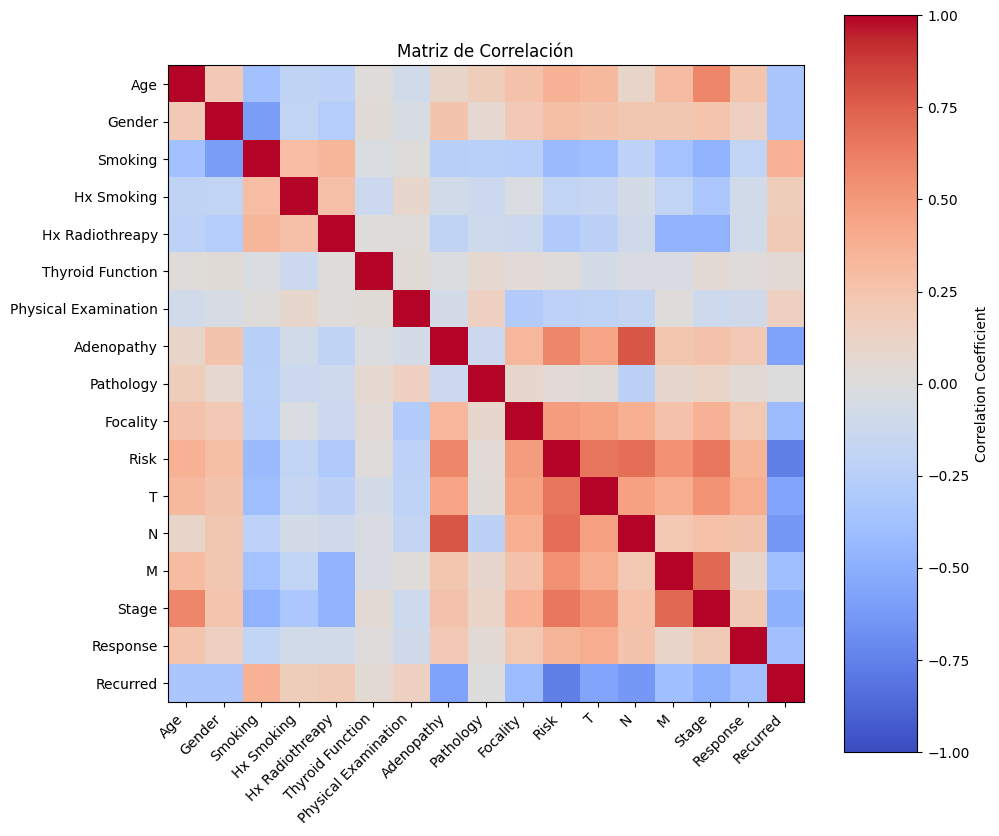

In [360]:
# Visualiza la matriz de correlacion
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlacion
cax = ax.imshow(corr_matrix.to_numpy(), cmap='coolwarm', vmin=-1, vmax=1)

# Ajusta
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# Añade una barra de color
cbar = fig.colorbar(cax, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Correlation Coefficient')

# Añade título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
plt.tight_layout()

plt.show()

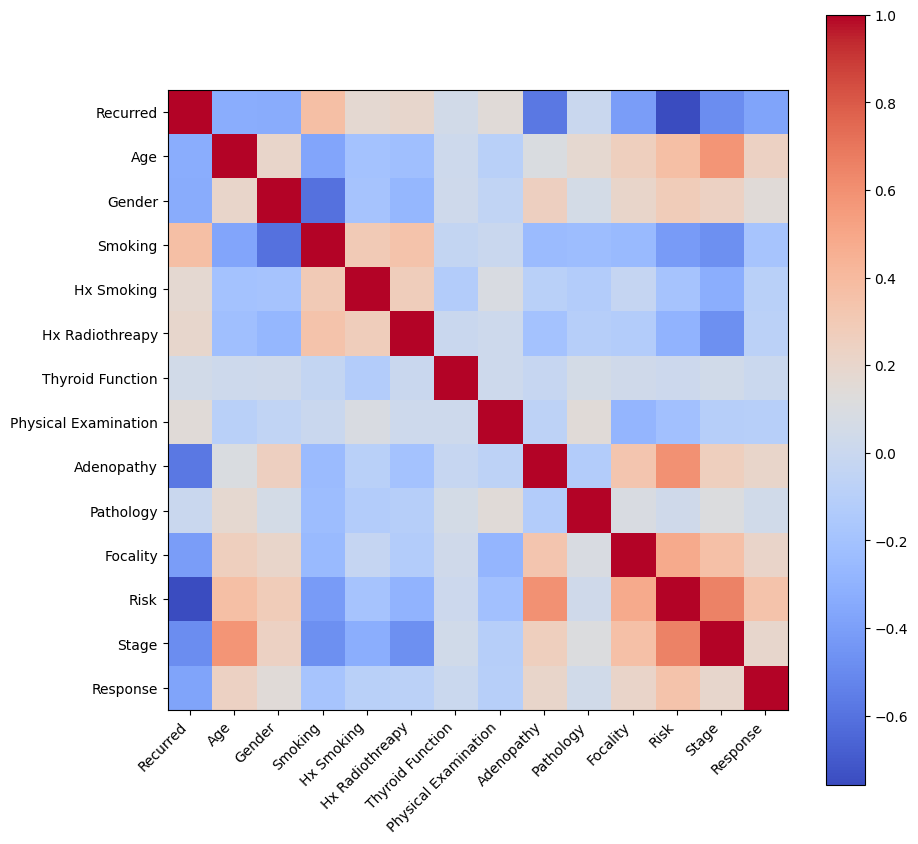

In [361]:
# Agrega la columna objetivo 'Recurred' a la lista de características
labels = df.loc[:, ["Recurred"] + features].columns.to_list()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlación con el tema 'coolwarm'
cax = ax.imshow(df.loc[:, ["Recurred"] + features].corr().to_numpy(), cmap='coolwarm')

# Establece las etiquetas de los ejes
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(labels, ha='right')

# Agrega una barra de color para mostrar la escala de correlación
fig.colorbar(cax)

plt.show()

# **Forward propagation**

In [362]:
X = df[features].values
Y = df['Recurred'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

In [363]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
#np.random.seed(8)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(7, 13)
w_output = np.random.rand(1, 7)

b_hidden = np.random.rand(7, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación (ReLU y Logistic)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


print(b_hidden)
print(b_output)
print(w_hidden)
print(w_output)

# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    print(f'{Z1=}')
    A1 = relu(Z1)
    print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

558
[[0.43322084]
 [0.34239852]
 [0.13658475]
 [0.41338516]
 [0.76524623]
 [0.49757947]
 [0.46194223]]
[[0.9808145]]
[[0.47236541 0.02456203 0.89627711 0.71360252 0.66356072 0.63199459
  0.97357352 0.94440609 0.05992103 0.8864766  0.03222242 0.29269822
  0.88593695]
 [0.91272609 0.55092354 0.61462052 0.28506    0.37476699 0.57670279
  0.41736573 0.94669532 0.00884478 0.05950369 0.46336217 0.04869225
  0.61903194]
 [0.68089241 0.6604416  0.96070826 0.81478688 0.63149952 0.46775996
  0.99816334 0.78362101 0.97471655 0.82066219 0.07481433 0.20651438
  0.16782573]
 [0.43345061 0.02027616 0.45573107 0.91123459 0.43745996 0.12192543
  0.42825454 0.71890106 0.70880669 0.95472898 0.66433183 0.91381529
  0.8598589 ]
 [0.03632237 0.36163248 0.9164824  0.13894641 0.47015371 0.17245775
  0.57733428 0.73630949 0.7532963  0.10928964 0.43854881 0.55865229
  0.25900811]
 [0.57437076 0.38633546 0.51982331 0.32539843 0.10600491 0.92864587
  0.88878879 0.11237566 0.18620933 0.35700175 0.81775274 0.525632

# **Cálculo de la precisión del forward propagation**

In [364]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

Z1=array([[3.7043602 , 4.57099172, 2.86219615, ..., 3.46434188, 3.43034892,
        5.16477912],
       [3.15508407, 3.05333165, 1.91737779, ..., 2.35232736, 2.4921255 ,
        3.2353946 ],
       [4.29334593, 4.21994562, 2.7677757 , ..., 2.89626665, 3.46037247,
        4.28893826],
       ...,
       [3.00949129, 3.05693253, 2.30278856, ..., 2.47634654, 2.98171449,
        3.22142939],
       [2.91095518, 2.86553613, 1.6379282 , ..., 1.76607639, 2.80772076,
        2.86733328],
       [3.81587553, 3.72280284, 2.76782265, ..., 2.84238517, 2.88760833,
        3.5096383 ]])
A1=array([[3.7043602 , 4.57099172, 2.86219615, ..., 3.46434188, 3.43034892,
        5.16477912],
       [3.15508407, 3.05333165, 1.91737779, ..., 2.35232736, 2.4921255 ,
        3.2353946 ],
       [4.29334593, 4.21994562, 2.7677757 , ..., 2.89626665, 3.46037247,
        4.28893826],
       ...,
       [3.00949129, 3.05693253, 2.30278856, ..., 2.47634654, 2.98171449,
        3.22142939],
       [2.91095518, 2.8655361

In [365]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.6953405017921154


# **Descenso de gradiente estocástico**

In [366]:
L = 0.05  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(10_000):
    # Seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # Pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # Distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


Se truncaron las últimas líneas 5000 del resultado de transmisión.
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
   

# **Cálculo de la red entrenada**

In [367]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

Z1=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
A1=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Z2=array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [368]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.3082437275985663


# **Pruebo con ejemplos**

In [369]:
# Definir las características de entrada para los nuevos datos
new_features = ["Age", "Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy", "Thyroid Function", "Physical Examination",
            "Adenopathy", "Pathology", "Focality", "Risk", "Stage", "Response"]

# Seleccionar características relevantes de los nuevos datos
random_rows = df.loc[:, ["Recurred"] + features].sample(n=10)

# Imprimir las filas aleatorias
random_rows

,Recurred,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
101,1,0.512195,0.0,1.0,1.0,1.0,0.00,0.50,0.00,0.666667,0.0,0.0,0.00,0.666667
267,1,0.500000,1.0,1.0,1.0,1.0,0.00,0.50,0.00,0.000000,0.0,0.0,0.00,0.000000
208,1,0.292683,0.0,1.0,1.0,1.0,1.00,0.00,0.50,0.000000,1.0,0.5,0.00,0.000000
432,0,0.426829,0.0,1.0,1.0,1.0,0.00,0.00,1.00,0.000000,1.0,1.0,0.00,0.333333
1,1,0.414634,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.333333,0.0,0.0,0.00,0.000000
584,0,0.268293,0.0,1.0,1.0,1.0,0.00,0.00,0.25,0.000000,1.0,0.5,0.00,0.333333
637,1,0.378049,0.0,1.0,1.0,1.0,0.25,1.00,0.00,0.333333,0.0,0.0,0.00,0.000000
453,0,0.878049,1.0,0.0,0.0,1.0,0.00,0.00,0.50,0.000000,1.0,1.0,1.00,0.333333
539,1,0.743902,0.0,1.0,1.0,1.0,0.00,0.25,0.00,0.000000,0.0,0.5,0.25,0.000000
564,0,0.768293,1.0,0.0,1.0,1.0,0.00,0.25,0.25,0.000000,1.0,0.5,0.25,0.333333


In [370]:
# Eliminar la columna "Recurred" del DataFrame "filas_aleatorias"
df_examples = random_rows.drop(columns=["Recurred"])

# Imprimir el DataFrame después de eliminar la columna
df_examples

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
101,0.512195,0.0,1.0,1.0,1.0,0.00,0.50,0.00,0.666667,0.0,0.0,0.00,0.666667
267,0.500000,1.0,1.0,1.0,1.0,0.00,0.50,0.00,0.000000,0.0,0.0,0.00,0.000000
208,0.292683,0.0,1.0,1.0,1.0,1.00,0.00,0.50,0.000000,1.0,0.5,0.00,0.000000
432,0.426829,0.0,1.0,1.0,1.0,0.00,0.00,1.00,0.000000,1.0,1.0,0.00,0.333333
1,0.414634,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.333333,0.0,0.0,0.00,0.000000
584,0.268293,0.0,1.0,1.0,1.0,0.00,0.00,0.25,0.000000,1.0,0.5,0.00,0.333333
637,0.378049,0.0,1.0,1.0,1.0,0.25,1.00,0.00,0.333333,0.0,0.0,0.00,0.000000
453,0.878049,1.0,0.0,0.0,1.0,0.00,0.00,0.50,0.000000,1.0,1.0,1.00,0.333333
539,0.743902,0.0,1.0,1.0,1.0,0.00,0.25,0.00,0.000000,0.0,0.5,0.25,0.000000
564,0.768293,1.0,0.0,1.0,1.0,0.00,0.25,0.25,0.000000,1.0,0.5,0.25,0.333333


In [371]:
for index, row in df_examples.iterrows():
    current_example = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila

    # Propagar hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(current_example.transpose())

    # Obtener la predicción (0 para vino tinto y 1 para vino blanco) usando un umbral de 0.5
    current_prediction = (A2_new > 0.5).astype(int)

    # Mostrar la predicción actual
    print(current_example)
    print(" ")
    print("Predicción para el ejemplo", index, ":", current_prediction)
    print("Activaciones de la capa de salida para el ejemplo", index, ":", A2_new)
    print(" ")

Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
[[0.51219512 0.         1.         1.         1.         0.
  0.5        0.         0.66666667 0.         0.         0.
  0.66666667]]
 
Predicción para el ejemplo 101 : [[0]]
Activaciones de la capa de salida para el ejemplo 101 : [[nan]]
 
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
Z2=array([[nan]])
[[0.5 1.  1.  1.  1.  0.  0.5 0.  0.  0.  0.  0.  0. ]]
 
Predicción para el ejemplo 267 : [[0]]
Activaciones de la capa de salida para el ejemplo 267 : [[nan]]
 
Z1=array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])
A1=array([[nan],
       [nan],
       [nan],
    

# **Red con scikit-learn**

In [372]:
X = df[features].values
Y = df["Recurred"].values

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(4),
                   activation='relu',
                   max_iter=20_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print("")
print(nn.intercepts_)
print("")
print("")

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# **Prueba con ejemplos**

In [374]:
for index, row in df_examples.iterrows():
    current_example = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila
    predictions = nn.predict(current_example)
    print(current_example)
    print(" ")
    print("Predicciones:", predictions)
    print(" ")
    print(" ")

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.